# [Exercise 1](https://github.com/kokchun/Maskininlarning-AI21/blob/main/Exercises/E01_gradient_descent.ipynb)

In [1]:
import numpy
import matplotlib.pyplot as pyplot

## 0

In [2]:
numpy.random.seed(42)
SAMPLES = 1000

features = numpy.random.rand(SAMPLES, 2)
noise = numpy.random.randn(1, SAMPLES)
y_vector =  3 * features[:,0] + 5 * features[:,1] + 3 + noise # Random from normal distribution
y_vector = y_vector.reshape(y_vector.size, -1)
X_matrix = numpy.c_[numpy.ones(SAMPLES), features]

## 1

### a)

$$C = \frac{1}{m}\sum_{i=1}^m (y_i - \hat{y}_i)^2 = \frac{1}{m} \sum_{i=1}^m (y_i - \vec{\theta}\cdot \vec{x}_i)^2$$
$$\vec{\theta}_{j+1} = \vec{\theta}_j - \eta\nabla_{\vec{\theta}} C(\vec{\theta})$$
$$\nabla_{\vec\theta} C(\vec{\theta}) = \ldots = \frac{2}{m}X^T(X\vec{\theta}-\vec{y})$$
step rule $\nabla_{\vec\theta} C(\vec{\theta})$ for the function $C$

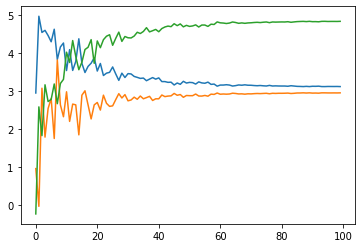

In [3]:
def gradient_decent(
    X_matrix: numpy.ndarray,
    y_vector: numpy.ndarray,
    learning_rate: float = 0.1,
    epochs: int = 100,
):
    X_MATRIX_LENGTH = len(X_matrix)
    weights = numpy.random.randn(X_matrix.shape[1], 1)

    for _ in range(epochs):
        gradient = 2 / X_MATRIX_LENGTH * X_matrix.T @ (X_matrix @ weights - y_vector)
        weights -= learning_rate * gradient

    return weights

def create_epochs_learning_rate_line(learning_rate: float, epochs: int):
    epoch_list = numpy.arange(1,epochs,5)
    weights_for_epoch_in_epoch_list = [gradient_decent(X_matrix, y_vector, epochs=number_of_epochs, learning_rate=learning_rate).flatten().tolist() for number_of_epochs in epoch_list]
    return weights_for_epoch_in_epoch_list

pyplot.plot(create_epochs_learning_rate_line(0.1, epochs=500))

### b)

Note it takes longer time with more epochs and when the learning rate is small took 0.4s in A) and < 20s below

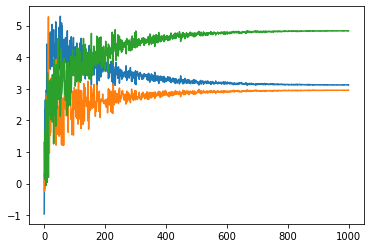

In [4]:
pyplot.plot(create_epochs_learning_rate_line(0.01, epochs=5000))

### c)

<AxesSubplot:title={'center':'Rate 0.6, Epochs 50'}>

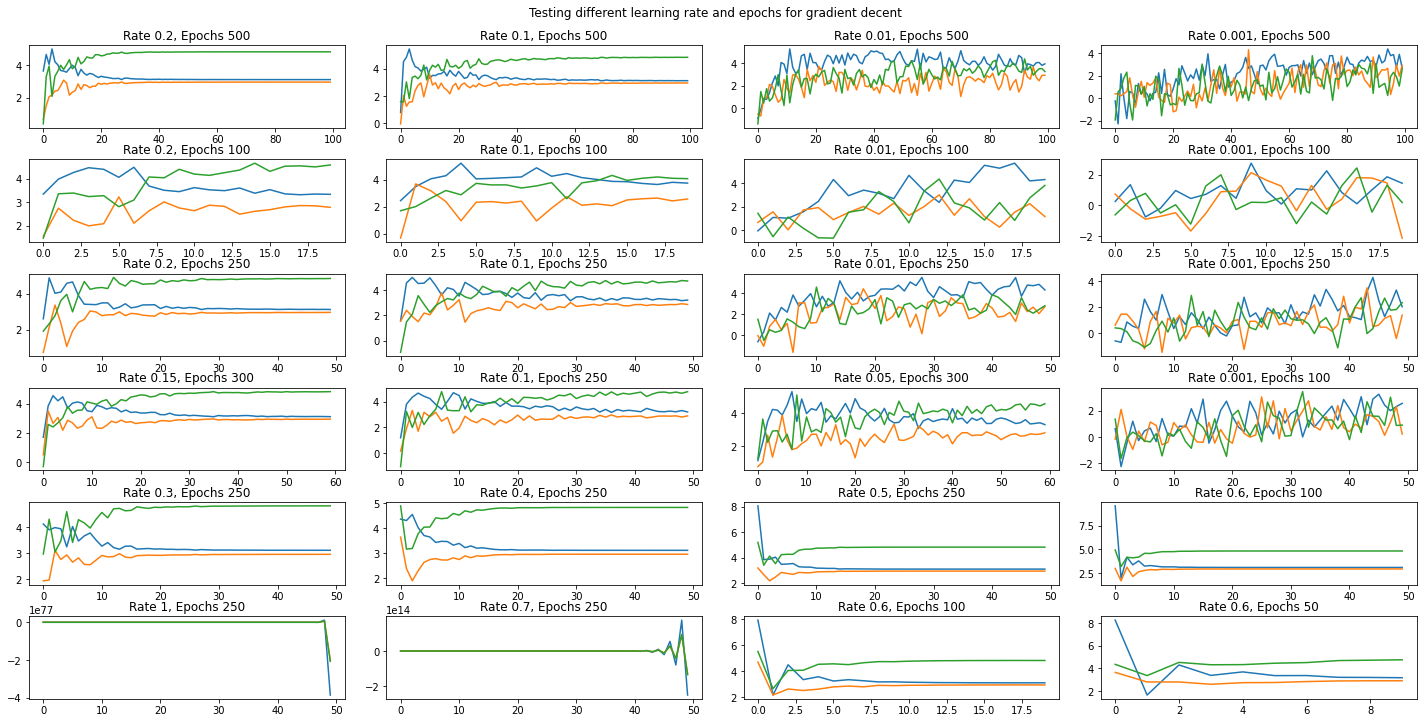

In [5]:
def plot_line_in_grid(plot, learning_rate, epochs, title):
    plot.plot(
        create_epochs_learning_rate_line(learning_rate=learning_rate, epochs=epochs)
    )
    plot.set_title(title)
    return plot


figure, (
    (plot1, plot2, plot3, plot4),
    (plot5, plot6, plot7, plot8),
    (plot9, plot10, plot11, plot12),
    (plot13, plot14, plot15, plot16),
    (plot17, plot18, plot19, plot20),
    (plot21, plot22, plot23, plot24),
) = pyplot.subplots(6, 4, figsize=(20, 10))
figure.suptitle("Testing different learning rate and epochs for gradient decent", y=1)
figure.tight_layout()
plot_line_in_grid(plot1, 0.2, 500, "Rate 0.2, Epochs 500")
plot_line_in_grid(plot2, 0.1, 500, "Rate 0.1, Epochs 500")
plot_line_in_grid(plot3, 0.01, 500, "Rate 0.01, Epochs 500")
plot_line_in_grid(plot4, 0.001, 500, "Rate 0.001, Epochs 500")

plot_line_in_grid(plot5, 0.2, 100, "Rate 0.2, Epochs 100")
plot_line_in_grid(plot6, 0.1, 100, "Rate 0.1, Epochs 100")
plot_line_in_grid(plot7, 0.01, 100, "Rate 0.01, Epochs 100")
plot_line_in_grid(plot8, 0.001, 100, "Rate 0.001, Epochs 100")

plot_line_in_grid(plot9, 0.2, 250, "Rate 0.2, Epochs 250")
plot_line_in_grid(plot10, 0.1, 250, "Rate 0.1, Epochs 250")
plot_line_in_grid(plot11, 0.01, 250, "Rate 0.01, Epochs 250")
plot_line_in_grid(plot12, 0.001, 250, "Rate 0.001, Epochs 250")

plot_line_in_grid(plot13, 0.15, 300, "Rate 0.15, Epochs 300")
plot_line_in_grid(plot14, 0.1, 250, "Rate 0.1, Epochs 250")
plot_line_in_grid(plot15, 0.05, 300, "Rate 0.05, Epochs 300")
plot_line_in_grid(plot16, 0.001, 250, "Rate 0.001, Epochs 100")

plot_line_in_grid(plot17, 0.3, 250, "Rate 0.3, Epochs 250")
plot_line_in_grid(plot18, 0.4, 250, "Rate 0.4, Epochs 250")
plot_line_in_grid(plot19, 0.5, 250, "Rate 0.5, Epochs 250")
plot_line_in_grid(plot20, 0.6, 250, "Rate 0.6, Epochs 100")

plot_line_in_grid(plot21, 1, 250, "Rate 1, Epochs 250")
plot_line_in_grid(plot22, 0.7, 250, "Rate 0.7, Epochs 250")
plot_line_in_grid(plot23, 0.6, 100, "Rate 0.6, Epochs 100")
plot_line_in_grid(plot24, 0.6, 50, "Rate 0.6, Epochs 50")

Seems like there is a sweet spot around 0.6 and 50-75 epochs

## 2

In [71]:
# epochs = 10
# t0, t1 = 5, 50  # learning schedule hyperparameters


# def learning_rate_schedule(t):
    # """Decrease learning rate as training progresses"""
    # return t0 / (t + t1)


# for epoch in range(epochs):
#     for i in range(m):
#         random_index = np.random.randint(m)
#         x_i = X_train[
#             random_index : random_index + 1
#         ]  # this gives an extra dimension on the matrix
#         y_i = y_train[random_index : random_index + 1]
#         gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
#         eta = learning_rate_schedule(epoch * m + i)
#         theta -= eta * gradients


def stochastic_gradient_decent(
    X_matrix: numpy.ndarray,
    y_vector: numpy.ndarray,
    learning_rate_schedule: tuple,
    epochs: int,
):
    t0, t1 = learning_rate_schedule
    def decrease_learning_rate(t):
        return t0 / (t + t1)

    X_matrix_LENGTH = len(X_matrix)
    weights = numpy.random.randn(X_matrix.shape[1], 1)

    for epoch in range(epochs):
        for iteration in range(X_matrix_LENGTH):
            random_index = numpy.random.randint(X_matrix_LENGTH)
            X_sample = X_matrix[random_index : random_index + 1]
            y_sample = y_vector[random_index : random_index + 1]
            gradients = 2 * X_sample.T.dot(X_sample.dot(weights) - y_sample) # dot() = Scalar multiplication
            remaining_schedule = decrease_learning_rate(epoch * X_matrix_LENGTH - iteration)
            weights -= remaining_schedule * gradients
    return weights

stochastic_gradient_decent(X_matrix, y_vector, (5,50), 200)

ZeroDivisionError: division by zero

In [ ]:
# check
# t0, t1 = 5, 50  # learning schedule hyperparameters
# epoch * m + i
# return t0 / (t + t1)